<a href="https://colab.research.google.com/github/rohankavari/MachineLearning/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv

--2021-12-02 09:52:26--  https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 363 [text/plain]
Saving to: ‘income.csv’

income.csv          100%[===================>]     363  --.-KB/s    in 0s      

2021-12-02 09:52:26 (14.2 MB/s) - ‘income.csv’ saved [363/363]



In [2]:
import pandas as pd
import seaborn as sns

In [30]:
df=pd.read_csv("/content/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


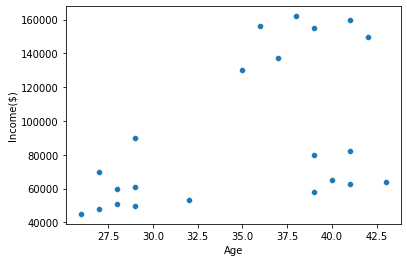

In [4]:
sns.scatterplot(data=df, x="Age", y="Income($)");

Visually we can say that there are 3 clusters.

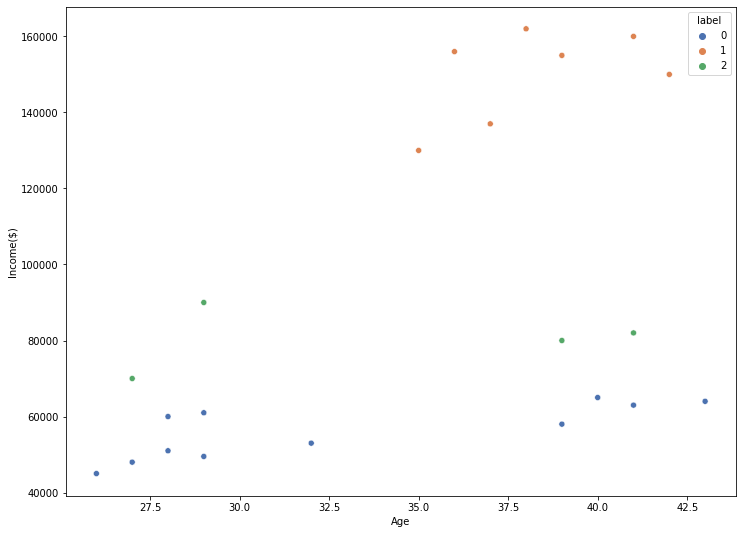

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=3,n_init=200,algorithm='elkan').fit(df[['Age','Income($)']])
df['label']=kmeans.predict(df[['Age','Income($)']])


plt.figure(figsize=(12,9))
sns.scatterplot(data=df, x="Age", y="Income($)",hue='label',palette="deep");

Fitting the same model on scaled data

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Age','Income($)']])

print(scaler.mean_)


df[['Age','Income($)']]=scaler.transform(df[['Age','Income($)']])

[3.48181818e+01 9.04318182e+04]


In [32]:
df

,Name,Age,Income($)
0,Rob,-1.356055,-0.480684
1,Michael,-1.009157,-0.010159
2,Mohan,-1.009157,-0.692421
3,Ismail,-1.182606,-0.715947
4,Kory,1.245679,1.401417
5,Gautam,0.725332,1.519048
6,David,1.072230,1.636679
7,Andrea,0.551883,1.683732
8,Brad,0.204985,1.542574
9,Angelina,0.031536,0.930891


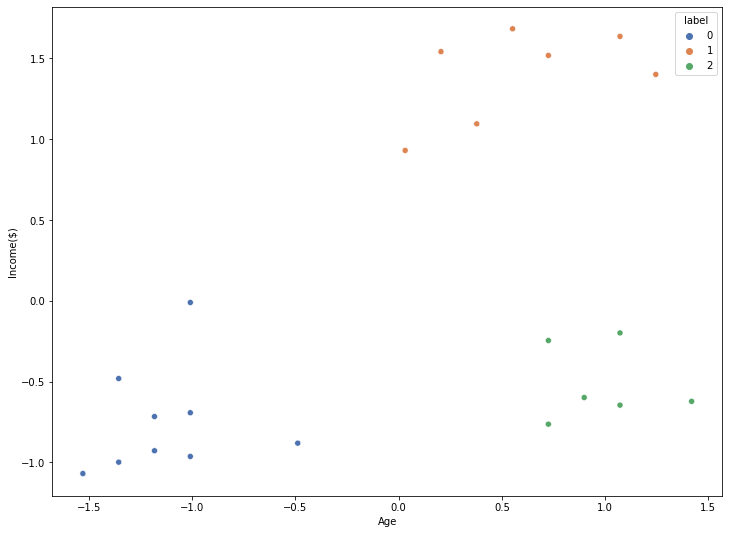

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=3,n_init=200,algorithm='elkan').fit(df[['Age','Income($)']])
df['label']=kmeans.predict(df[['Age','Income($)']])


plt.figure(figsize=(12,9))
sns.scatterplot(data=df, x="Age", y="Income($)",hue='label',palette="deep");

This gives a better result.

Finding the optimal k via Elbow method

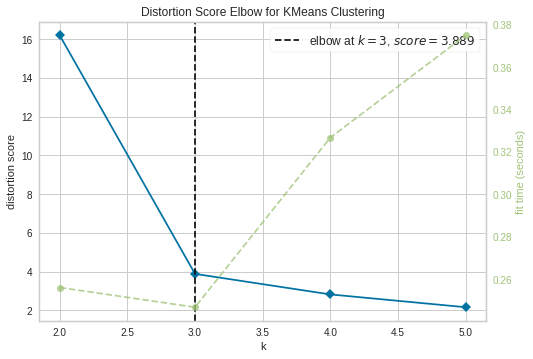

In [37]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(2,6))

visualizer.fit(df[['Age','Income($)']])        # Fit the data to the visualizer
visualizer.show()

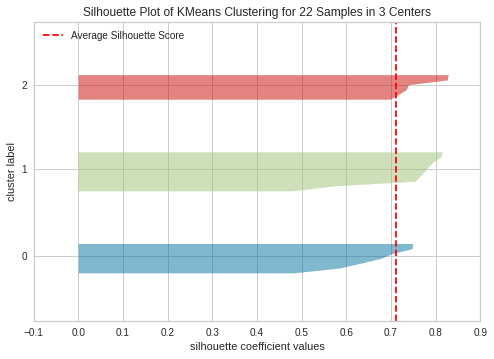

In [38]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans = KMeans(n_clusters=3,n_init=200,algorithm='elkan')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(df[['Age','Income($)']])        # Fit the data to the visualizer
visualizer.show()        

In [ ]:
from scipy.spatial 
import Voronoi, voronoi_plot_2d 
vor = Voronoi(centers) 
voronoi_plot_2d(vor) 
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=5, cmap='summer') 
plt.show()

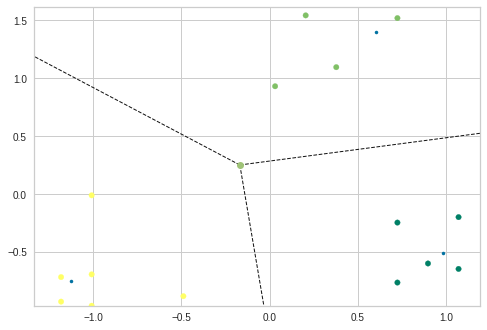

In [52]:
from scipy.spatial import Voronoi, voronoi_plot_2d 
kmeans = KMeans(n_clusters=3,n_init=200,algorithm='elkan').fit(df[['Age','Income($)']])
y_kmeans=kmeans.predict(df[['Age','Income($)']])

centers = kmeans.cluster_centers_ # cluster center coordinates 
vor = Voronoi(centers) 
voronoi_plot_2d(vor) 
plt.scatter(df['Age'],df['Income($)'], c=y_kmeans, s=30, cmap='summer') 
plt.show()

By the above 2 methods we can conclude 3 is the optimal value of k